<a href="https://colab.research.google.com/github/Abhijndl/WINE-QUALITY/blob/main/wine_quality_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Setting up the development environment by importing required libraries and modules:**

In [1]:
import pandas as pd
import numpy as np
import io
from sklearn import linear_model
from sklearn.linear_model import LinearRegression as lm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

**Uploading the CSV file**

In [2]:
from google.colab import files
uploaded=files.upload()

Saving winequality-red (1).csv to winequality-red (1).csv


In [4]:
dataset=pd.read_csv(io.BytesIO(uploaded['winequality-red (1).csv']))

**We select five cells from the stsrt of the table to sample out the data.**



In [5]:
dataset.head(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Now we begin with analysis of this data.**

In [6]:
print("shape of our dataset of red wine : {s}".format(s=dataset.shape))
print("columns headers/names: {s}".format(s = list(dataset)))

shape of our dataset of red wine : (1599, 12)
columns headers/names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


**Dataset.info() function provides the detailed structure of the table and datatypes and attributes**

In [7]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**describe() function give the idea of all the attributes of the dataset**

In [8]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Using isnull().sum() function we extract the count of total number of null entries in each attribute.**

In [9]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
dataset=dataset.rename(columns={'fixed acidity':'acidity_fixed','volatile acidity':'acidity_volatile', 'citric acid':'acid_citric', 'residual sugar':'residual_sugar', 'chlorides':'chlorides', 'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide', 'density':'density', 'pH':'pH', 'sulphates':'sulphates', 'alcohol':'alcohol', 'quality':'quality'})
dataset.head(n=5)

,acidity_fixed,acidity_volatile,acid_citric,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3])

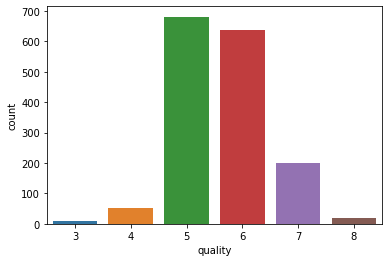

In [12]:
seabornInstance.countplot(x='quality',data=dataset)

In [13]:
conditions=[
            (dataset['quality']>=7),
            (dataset['quality']<=4)
]
rating=['superior','inferior']
dataset['rating']=np.select(conditions,rating,default='fine')
dataset.rating.value_counts()

fine        1319
superior     217
inferior      63
Name: rating, dtype: int64

In [14]:
dataset.groupby('rating').mean()

,acidity_fixed,acidity_volatile,acid_citric,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
fine,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
inferior,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
superior,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


**HEAT MAP**

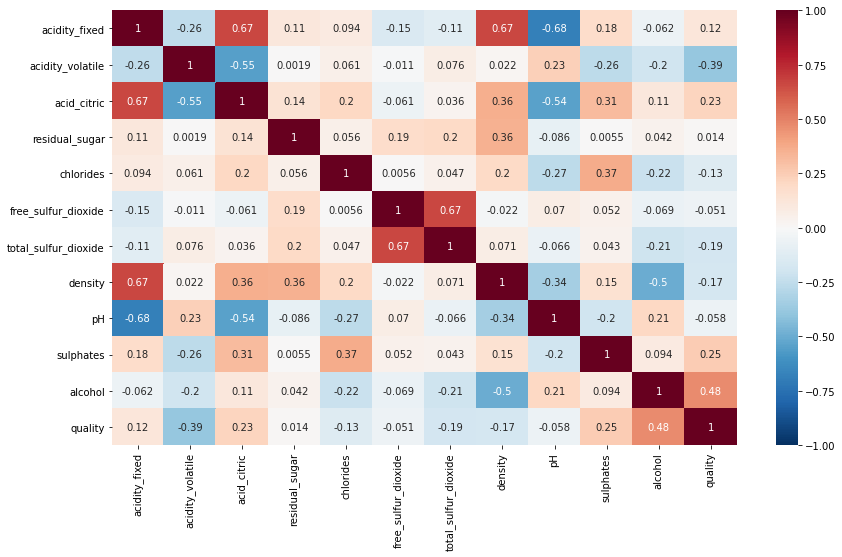

In [15]:
correlation=dataset.corr()
plt.figure(figsize=(14,8))
seabornInstance.heatmap(correlation,annot= True ,linewidths=0,vmin=-1,cmap="RdBu_r")

In [16]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
acid_citric             0.226373
acidity_fixed           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
acidity_volatile       -0.390558
Name: quality, dtype: float64

**ALCOHOL PERCENTAGE VS WINE QUALITY**

[Text(0, 0.5, 'Alcohol Percent'),
 Text(0.5, 0, 'Quality Dataset'),
 Text(0.5, 1.0, 'Alcohol Percent in different quality datasets')]

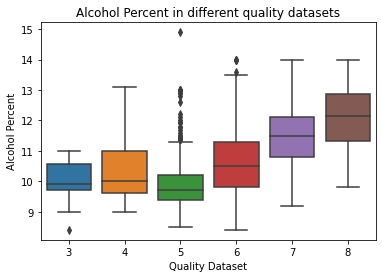

In [17]:
bx=seabornInstance.boxplot(x="quality",y='alcohol',data=dataset)
bx.set(xlabel='Quality Dataset',ylabel='Alcohol Percent',title='Alcohol Percent in different quality datasets')

**SULPHATES VS RATING DATASET**

[Text(0, 0.5, 'Sulphates'),
 Text(0.5, 0, 'Rating Dataset'),
 Text(0.5, 1.0, 'Sulphates Percent in different quality datasets')]

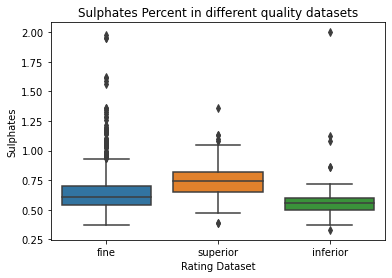

In [18]:
bx=seabornInstance.boxplot(x="rating",y='sulphates',data=dataset)
bx.set(xlabel='Rating Dataset',ylabel='Sulphates',title='Sulphates Percent in different quality datasets')

**CITRIC ACID VS RATING DATASET**

[Text(0, 0.5, 'Acid Citric'),
 Text(0.5, 0, 'Dataset Rating'),
 Text(0.5, 1.0, 'Acid Citric in different quality datasets')]

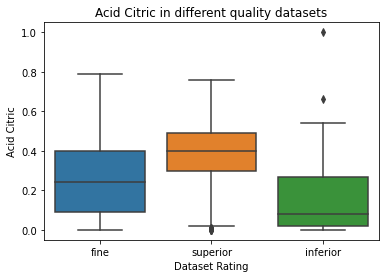

In [19]:
bx=seabornInstance.boxplot(x="rating",y='acid_citric',data=dataset)
bx.set(xlabel='Dataset Rating',ylabel='Acid Citric',title='Acid Citric in different quality datasets')

**ACIDITY FIXED VS RATING DATASET**

[Text(0, 0.5, 'Fixed Acidity'),
 Text(0.5, 0, 'Dataset Rating'),
 Text(0.5, 1.0, 'Fixed Acidity Percent in different quality datasets')]

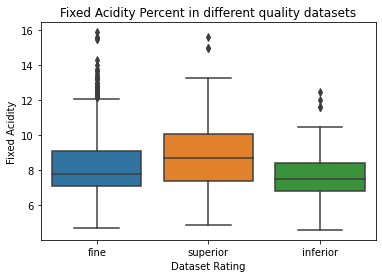

In [20]:
bx=seabornInstance.boxplot(x="rating",y='acidity_fixed',data=dataset)
bx.set(xlabel='Dataset Rating',ylabel='Fixed Acidity',title='Fixed Acidity Percent in different quality datasets')

**CHLORIDES VS RATING DATASET**

[Text(0, 0.5, 'chlorides'),
 Text(0.5, 0, 'Dataset Rating'),
 Text(0.5, 1.0, 'Chlorides Percent in different quality datasets')]

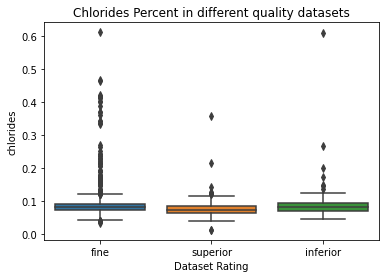

In [21]:
bx=seabornInstance.boxplot(x="rating",y='chlorides',data=dataset)
bx.set(xlabel='Dataset Rating',ylabel='chlorides',title='Chlorides Percent in different quality datasets')

 **The graph given below show in linear regression between residual sugar and alcohol content for different quality ratings(inferior,fine,superior) of red wine.

An observation can be made that in the superior and fine red wine types the residual sugar content remains almost same irrespective of change in alcohol content value on contrast to which it can be observed that the residual sugar value increases gradually when there is an increase in the alcohol content .

This analysis can help in production of higher percent of good quality wine with continuous monitoring and cont rol of alcohol and residual sugar content in red wine**

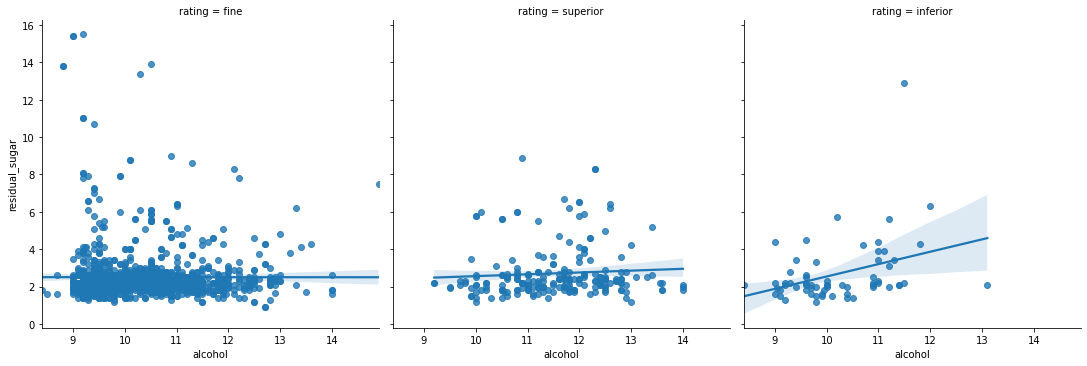

In [22]:
seabornInstance.lmplot(x="alcohol",y="residual_sugar",col="rating",data=dataset)

In [23]:
bins = [0, 5.5, 7.5, 10] # this means 3-5 are low, 6-7 are mid, 8-9 are high
labels = [0, 1, 2]
dataset['quality'] = pd.cut(dataset['quality'], bins=bins, labels=labels)

In [24]:
x = dataset[dataset.columns[:-1]]
y = dataset['quality']
sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [25]:
print(y_train)

493     1
354     1
342     1
834     0
705     0
       ..
1130    1
1294    1
860     0
1459    1
1126    1
Name: quality, Length: 1279, dtype: category
Categories (3, int64): [0 < 1 < 2]


In [26]:
for data in [y_train, y_test]:
    print(data.describe())

count     1279
unique       3
top          1
freq       663
Name: quality, dtype: int64
count     320
unique      3
top         1
freq      174
Name: quality, dtype: int64


In [27]:
z=y_test.to_numpy()
z

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0,

**Using different models**

1.**KNN where n=3**

In [28]:
n3 = KNeighborsClassifier(n_neighbors = 3)
n3.fit(x_train, y_train)
pred_n3 = n3.predict(x_test)
print(classification_report(y_test, pred_n3))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       141
           1       0.98      0.98      0.98       174
           2       1.00      0.60      0.75         5

    accuracy                           0.98       320
   macro avg       0.99      0.86      0.90       320
weighted avg       0.98      0.98      0.98       320



In [29]:
y_predicted = n3.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[139,   2,   0],
       [  3, 171,   0],
       [  0,   2,   3]])

In [30]:
n3.score(x_test,y_test)

0.978125

2.**KNN where n=5**

In [31]:
n5 = KNeighborsClassifier(n_neighbors = 5)
n5.fit(x_train, y_train)
pred_n5 = n5.predict(x_test)
print(classification_report(y_test, pred_n5))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       141
           1       0.98      0.98      0.98       174
           2       1.00      0.60      0.75         5

    accuracy                           0.98       320
   macro avg       0.99      0.86      0.90       320
weighted avg       0.98      0.98      0.98       320



In [32]:
n5.score(x_test,y_test)

0.978125

In [33]:
y_predicted = n5.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[139,   2,   0],
       [  3, 171,   0],
       [  0,   2,   3]])

In [34]:
df = pd.DataFrame({'Actual': z.flatten(), 'Predicted': pred_n5.flatten()})
df

,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
315,1,1
316,0,0
317,0,0
318,1,1


In [35]:
n5.score(x_test,y_test)

0.978125

3.**Random Forest Model**

In [36]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       174
           2       1.00      1.00      1.00         5

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [37]:
y_predicted = rf.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[141,   0,   0],
       [  0, 174,   0],
       [  0,   0,   5]])

In [38]:
df = pd.DataFrame({'Actual': z.flatten(), 'Predicted': pred_rf.flatten()})
df

,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
315,1,1
316,0,0
317,0,0
318,1,1


In [39]:
rf.score(x_test,y_test)

1.0

4.**Decision Tree Model**

In [40]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       174
           2       1.00      1.00      1.00         5

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [41]:
df = pd.DataFrame({'Actual': z.flatten(), 'Predicted': pred_dt.flatten()})
df

,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
315,1,1
316,0,0
317,0,0
318,1,1


In [42]:
y_predicted = dt.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[141,   0,   0],
       [  0, 174,   0],
       [  0,   0,   5]])

In [43]:
dt.score(x_test,y_test)

1.0

5.**SGD Classifier**

In [44]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       174
           2       1.00      1.00      1.00         5

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [45]:
df = pd.DataFrame({'Actual': z.flatten(), 'Predicted': pred_sgd.flatten()})
df

,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
315,1,1
316,0,0
317,0,0
318,1,1


In [46]:
sgd.score(x_test,y_test)

1.0

6.**Logistic Regression**

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [48]:
LR = LogisticRegression().fit(x_train,y_train)

logistic regression accuracy score:  100.0


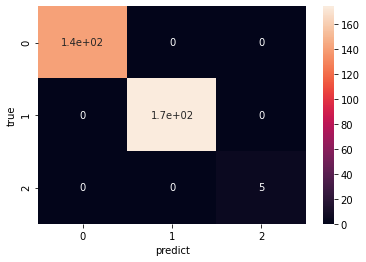

In [49]:
pred_LR = LR.predict(x_test)
cm2 = confusion_matrix(y_test,pred_LR)
ax2 = seabornInstance.heatmap(cm2,annot=True)
ax2.set(xlabel='predict', ylabel='true')
pred2 = accuracy_score(y_test,pred_LR)
print("logistic regression accuracy score: ",pred2*100)

In [50]:
LR.score(x_test,y_test)

1.0

In [51]:
print(y_test)

803     1
124     0
350     1
682     0
1326    1
       ..
1259    1
1295    0
1155    0
963     1
704     0
Name: quality, Length: 320, dtype: category
Categories (3, int64): [0 < 1 < 2]


In [52]:
print(pred_LR)

[1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 2 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1
 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1
 1 0 2 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 2
 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 2 0 0 0 1 1
 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0
 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 2 1 0 0 1
 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0]


**COMPARING THE ACTUAL VALUES WITH THE PREDICTED VALUES**

In [53]:
df = pd.DataFrame({'Actual': z.flatten(), 'Predicted': pred_LR.flatten()})
df

,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
315,1,1
316,0,0
317,0,0
318,1,1


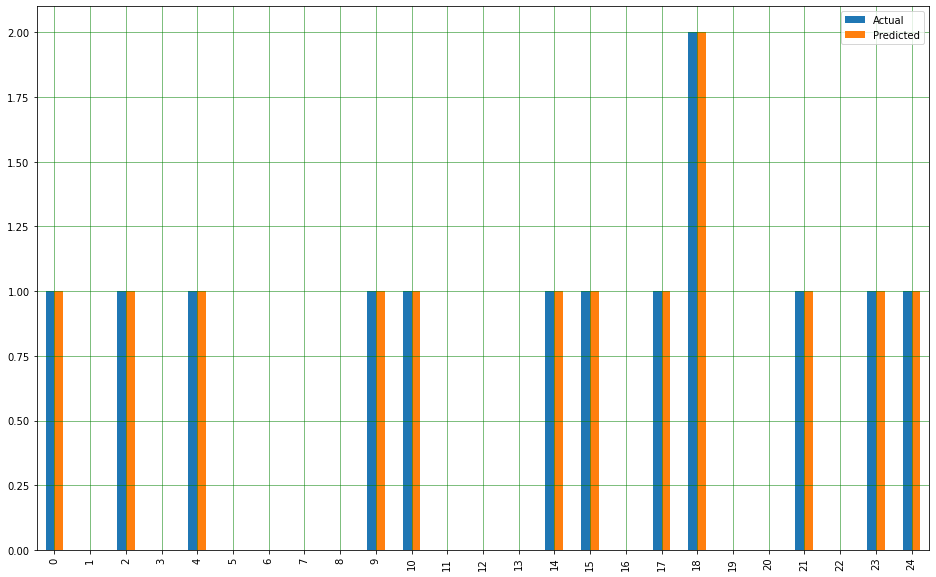

In [54]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [55]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_LR))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_LR))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_LR)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
